In [1]:
import numpy as np #NumPy does funny math good
import gym #imports OpenAI Gym which has a bunch of environments(games) to play with
import matplotlib.pyplot as plt

In [2]:
# Terminology:
#     - Enviornemt In reinforcement learning tasks we have a notion of the enviornment. This is what our agent will explore. An example of an enviornment in the case of training an AI to play say a game of mario would be the level we are training the agent on.

#     - Agent an agent is an entity that is exploring the enviornment. Our agent will interact and take different actions within the enviornment. In our mario example the mario character within the game would be our agent.

#     - State always our agent will be in what we call a state. The state simply tells us about the status of the agent. The most common example of a state is the location of the agent within the enviornment. Moving locations would change the agents state.

#     - Action any interaction between the agent and enviornment would be considered an action. For example, moving to the left or jumping would be an action. An action may or may not change the current state of the agent. In fact, the act of doing nothing is an action as well! The action of say not pressing a key if we are using our mario example.

#     - Reward every action that our agent takes will result in a reward of some magnitude (positive or negative). The goal of our agent will be to maximize its reward in an enviornment. Sometimes the reward will be clear, for example if an agent performs an action which increases their score in the enviornment we could say they've recieved a positive reward. If the agent were to perform an action which results in them losing score or possibly dying in the enviornment then they would recieve a negative reward.

#The most important part of reinforcement learning is determing how to reward the agent. After all, the goal of the agent is to maximize its rewards. This means we should reward the agent appropiately such that it reaches the desired goal.

In [3]:
env = gym.make("FrozenLake8x8-v0") #Creates Environment "FrozenLake8x8-v0" from OpenAI Gym

In [4]:
print("Number of States:", env.observation_space.n)
print("Number of Actions per State", env.action_space.n)


Number of States: 64
Number of Actions per State 4


In [5]:
#Building the Q-Table
Q = np.zeros((env.observation_space.n, env.action_space.n)) #Creates a 64x4 Array of all possible States and Actions

def getQ(state, action):
    return Q[state,action] + ALPHA * (reward + GAMMA*max(Q[new_state,:]) - Q[state,action])
    #      (current Q val)   (LR)       ||     (DF)  (max next reward)    (current Q val)

In [6]:
#Learning
EPISODES = 30_000_000
MAX_STEPS = 1000
EPSILON = 0.9
from tqdm import tqdm
progress = tqdm(total=EPISODES, position=0, leave=False)
progress.set_description("Progress")

#Q-Table
ALPHA = 0.81 #Represents the Learning Rate. This determines how much the agent will explore. High LR means more exploration
GAMMA = 0.96 #Represents the Discount Factor. This determines how much the agent values the future reward. High DF means future rewards are more heavily considered

rewards = [] #Log of Rewards per Episode

#Training
for e in range(EPISODES):
    progress.update(1)
    
    state = env.reset() #Resets Environment

    for s in range(MAX_STEPS):
        
        #env.render() #Renders Environment. CAUTION: Rendering takes more time to train
        
        #Picks Action. Chooses a random action EPSILON% of the time. Otherwise chooses the max reward option
        if(np.random.uniform(0,1) < EPSILON):
            action = env.action_space.sample() #Takes a random action, samples from env.action_space which is a list of possible actions {0: Left, 1: Down, 2: Right, 3: Up}
        else: 
            action = np.argmax(Q[state, : ])
        new_state, reward, done, _ = env.step(action) #Takes the action

        #Updating Q-Table
        Q[state, action] = getQ(state, action)

        #changes states
        state = new_state

        #Handles if game finished
        if done:
            rewards.append(reward) #Adds 
            EPSILON -= 1/EPISODES #Steps down the random action rate to prioritize rewards over exploration
            break

Progress: 100%|█████████▉| 29999993/30000000 [7:35:25<00:00, 593.08it/s]

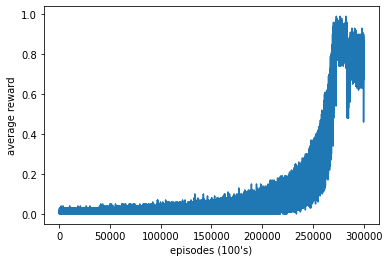

In [7]:
#Plotting the learning
def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()

In [25]:
state = env.reset() #Resets Environment

for s in range(MAX_STEPS):
    
    #env.render() #Renders Environment. CAUTION: Rendering takes more time to train
    
    #Picks Action based on max reward
    action = np.argmax(Q[state, : ])
    new_state, reward, done, _ = env.step(action) #Takes the action

    #changes states
    state = new_state

    #Handles if game finished
    if done:
        break
print("It took", s, "steps to finish")
env.render()

It took 62 steps to finish
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
